In [1]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
import cv2
import numpy as np
import csv
from PIL import Image
import glob
import os
from skimage import measure
from scipy import ndimage
from tqdm import tqdm

In [2]:
sam = sam_model_registry["default"](checkpoint="sam_vit_h_4b8939.pth")
sam.to(device='cuda')
mask_generator = SamAutomaticMaskGenerator(sam)

In [3]:
img = cv2.imread('/home/scco0002/F&E_DeepLearning_VS/sam/dataset_2_2023_05_04/train/picture_145.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
masks = mask_generator.generate(img)
sorted_masks = sorted(masks, key=(lambda x: x['area']), reverse=True)

In [4]:
def find_biggest_contiguous_area(array):
    labels,_ = ndimage.label(array)
    counts = np.bincount(labels.flatten())
    max_label = np.argmax(counts[1:]) + 1
    region = (labels == max_label)
    
    return region

ratio 3.2804878048780486
area 18909


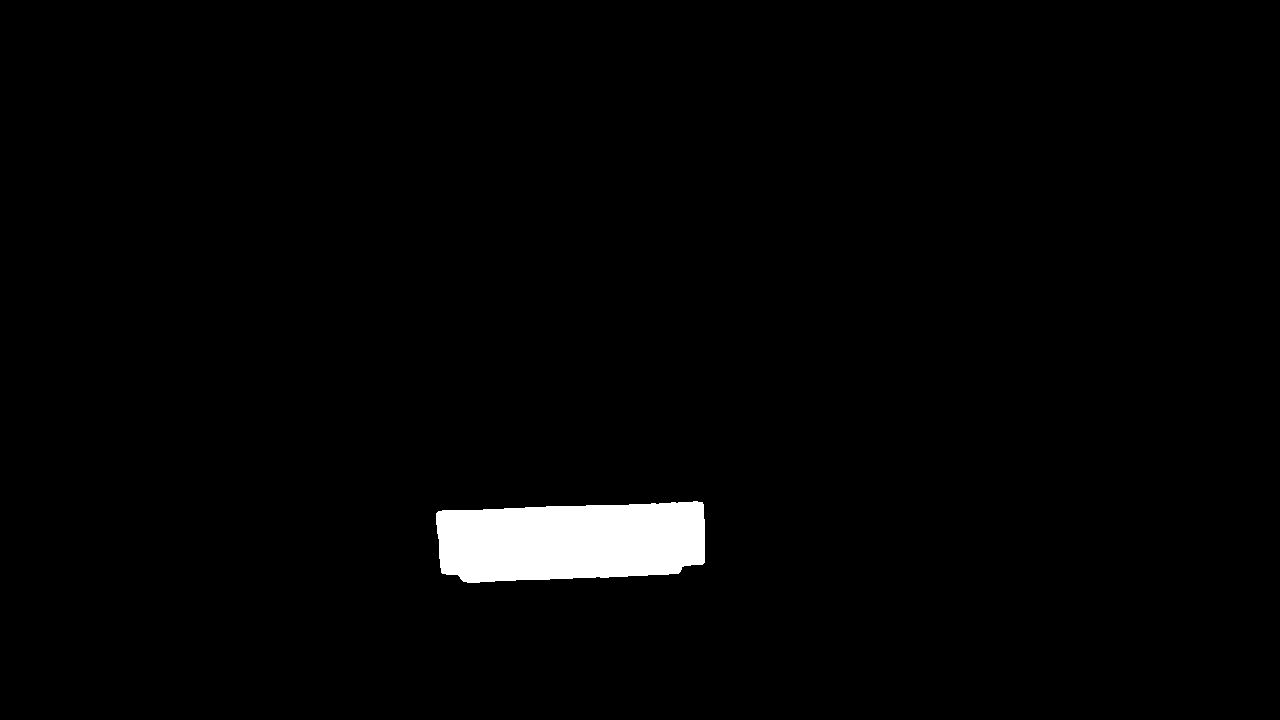

ratio 17.209302325581394
area 18781


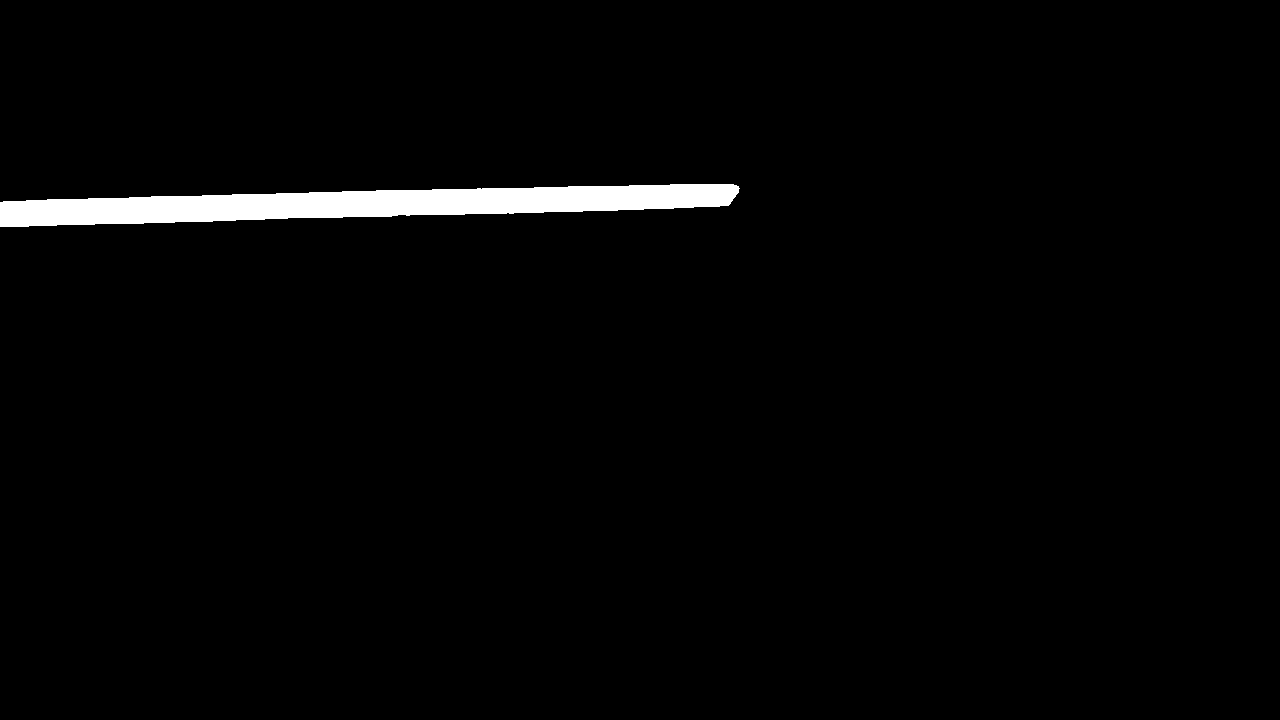

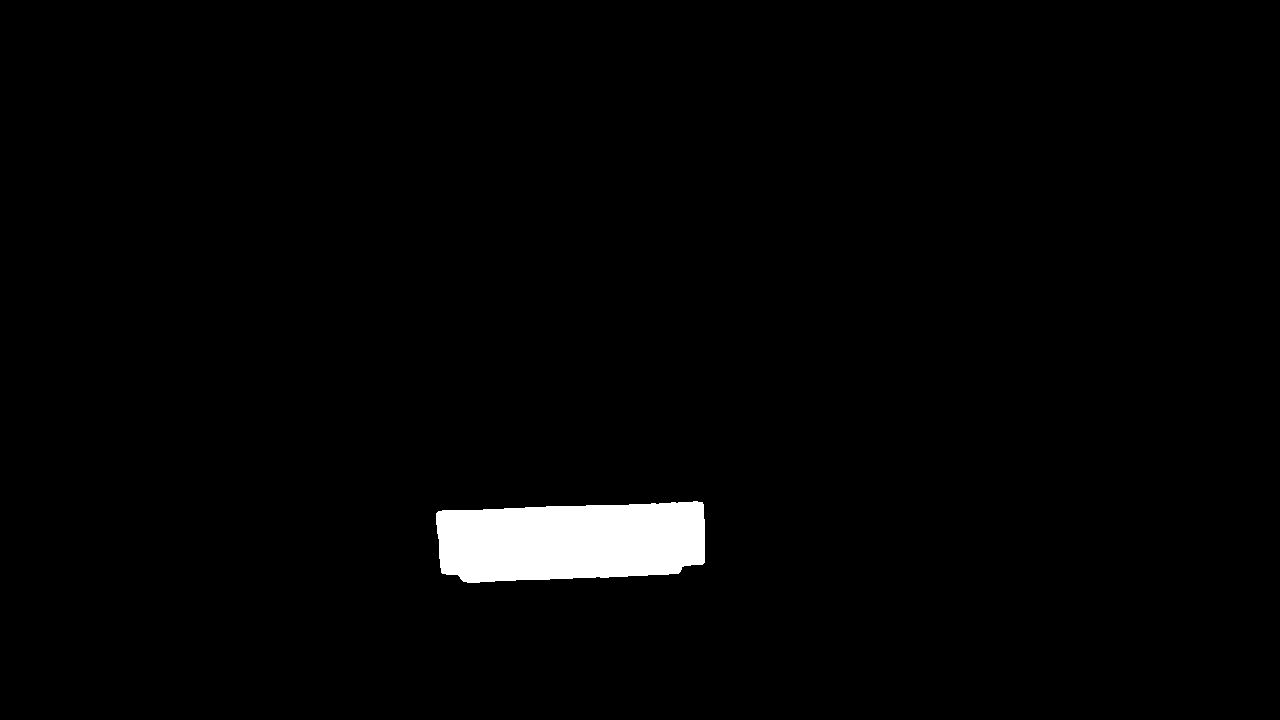

In [5]:
ratio_with_mask = [[],[]]

default_ratio = 3.5
for mask in sorted_masks:
    if mask['area'] > 12000 and mask['area'] < 24000:
        maybe_plugmask = find_biggest_contiguous_area(mask['segmentation'])
        maybe_plugmask = np.array(maybe_plugmask, dtype=np.uint8)
        num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(maybe_plugmask)
        bbox = stats[1][:4]
        x,y,w,h = bbox
        ratio_with_mask[0].append(w/h)
        ratio_with_mask[1].append(maybe_plugmask)
        print("ratio",w/h)
        print("area",mask['area'])
        plug_mask = mask['segmentation']
        plug_image = Image.fromarray(plug_mask.astype('uint8') * 255, mode='L')
        display(plug_image)


closest_value = min(ratio_with_mask[0], key=lambda x: abs(x - default_ratio))
closest_index = ratio_with_mask[0].index(closest_value)
plug_mask = ratio_with_mask[1][closest_index]
plug_image = Image.fromarray(plug_mask.astype('uint8') * 255, mode='L')
display(plug_image)


    